<a href="https://colab.research.google.com/github/nhatpd/2021-Summer-School/blob/main/APG_for_Linear_BinaryLogistic_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accelerated proximal gradient (APG) algorithms for regression models:
1. Linear regression with lasso
2. logistic regression with lasso

# Experiment on red wine quality

In [4]:
import pandas as pd
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep = ';')
X = red_wine.drop(['quality'],axis =1)
y = red_wine['quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_tr_prepared = std.fit_transform(X_train)

X_t_prepared = std.transform(X_test)

# APG for l1-regularized linear regression model

In [17]:
import time 
import numpy as np

class Linear_R:

  def __init__(self, w0, eta = 0.1, maxIter = 1000, alpha = 0.1, maxTime = None, tol = None, inertial = True):

    self.w = w0
    self.eta = eta
    self.maxIter = maxIter
    self.alpha = alpha
    self.maxTime = maxTime
    self.tol = tol
    self.inertial = inertial
    self.Time = []
    self.Time.append(0)
    self.obj = []
    self.rmse_train = []

  def soft_thresholding(self, v, gamma):
    return np.sign(v)*np.maximum(np.abs(v) - gamma,0)

  def fit(self, X_train, y_train):

    n, d = X_train.shape
    
    X_train = np.c_[np.ones((n, 1)), X_train]
    XTy = X_train.T.dot(y_train)

    Xw = X_train.dot(self.w)
    mse = np.linalg.norm(Xw - y_train)**2/n
    self.obj.append(mse + self.alpha*np.abs(self.w).sum())
    self.rmse_train.append(np.sqrt(mse))
    t = 1
    Xwp = Xw
    wp = self.w
    for iter in range(self.maxIter):
      start_time = time.time()

      if self.inertial:
        tp = t
      else:
        tp = 1
      t = (1+np.sqrt(1+4*tp**2))/2
      beta = (tp-1)/t

      Xwpp = (1+beta)*Xw - beta*Xwp

      grad = 2/n * (X_train.T.dot(Xwpp) - XTy)
      v = (1+beta)*self.w - beta*wp - self.eta * grad
      wp = self.w
      self.w = self.soft_thresholding(v,self.eta*self.alpha)
      Xwp = Xw
      Xw = X_train.dot(self.w)

      self.Time.append(time.time() - start_time + self.Time[-1])
      mse = np.linalg.norm(Xw - y_train)**2/n
      self.obj.append(mse + self.alpha*np.abs(self.w).sum())
      self.rmse_train.append(np.sqrt(mse))

      #stopping conditions
      if self.maxTime is not None:
        if self.Time[-1] > self.maxTime:
          print('Stopped by MaxTime at ',iter,'-th iterattion')
          break
      if self.tol is not None:
        if np.abs(obj[-1] - obj[-2]) <= self.tol:
          print('Stopped by the objective value at ',iter,'-th iterattion')
          break
      
  def predict(self, X_test):
    n, d = X_test.shape
    X_test = np.c_[np.ones((n, 1)), X_test]
    return X_test.dot(self.w)

In [7]:
w0 = np.random.randn(X_tr_prepared.shape[1]+1)
model = Linear_R(w0,maxTime=1)
model.fit(X_tr_prepared,y_train)

# Experiment on BlogFeedback

In [8]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=b3da4b28a42b22873284d25197d636f31b9b2eb35a3c46d2dffdd54b026b1339
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [9]:
wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/00304/BlogFeedback.zip','BlogFeedback.zip')
!unzip BlogFeedback.zip

Archive:  BlogFeedback.zip
  inflating: blogData_test-2012.02.01.00_00.csv  
  inflating: blogData_test-2012.02.02.00_00.csv  
  inflating: blogData_test-2012.02.03.00_00.csv  
  inflating: blogData_test-2012.02.04.00_00.csv  
  inflating: blogData_test-2012.02.05.00_00.csv  
  inflating: blogData_test-2012.02.06.00_00.csv  
  inflating: blogData_test-2012.02.07.00_00.csv  
  inflating: blogData_test-2012.02.08.00_00.csv  
  inflating: blogData_test-2012.02.09.00_00.csv  
  inflating: blogData_test-2012.02.10.00_00.csv  
  inflating: blogData_test-2012.02.11.00_00.csv  
  inflating: blogData_test-2012.02.12.00_00.csv  
  inflating: blogData_test-2012.02.13.00_00.csv  
  inflating: blogData_test-2012.02.14.00_00.csv  
  inflating: blogData_test-2012.02.15.00_00.csv  
  inflating: blogData_test-2012.02.16.00_00.csv  
  inflating: blogData_test-2012.02.17.00_00.csv  
  inflating: blogData_test-2012.02.18.00_00.csv  
  inflating: blogData_test-2012.02.19.00_00.csv  
  inflating: blogData_t

In [10]:
train = pd.read_csv('blogData_train.csv',header = None)
test = pd.read_csv('blogData_test-2012.03.31.01_00.csv',header = None)
X_train = train.drop([280],axis =1)
y_train = train[280]

X_test = test.drop([280],axis =1)
y_test = test[280]

std = StandardScaler()
X_tr_prepared = std.fit_transform(X_train)
X_t_prepared = std.transform(X_test)

In [18]:
w0 = np.random.randn(X_tr_prepared.shape[1]+1)
model = Linear_R(w0,eta = 0.01, maxTime=0.5, alpha =2)
model.fit(X_tr_prepared,y_train)

Stopped by MaxTime at  24 -th iterattion


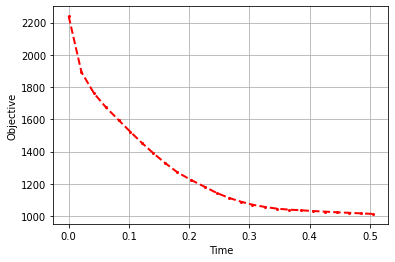

In [19]:
import matplotlib.pyplot as plt

plt.plot(model.Time, model.obj, 'o-', color='red', markersize=2, linewidth =2, linestyle='--')

plt.xlabel('Time')
plt.ylabel('Objective')
plt.grid(True)

Practice:

1. Implement Ridge and Elastic Net regressions
2. Compute the Lipschitz constant and train models with this learning rate
3. Implement early_stopping using class Linear_R without modifying

# APG for Logistic regression model

Experiment on GISETTE

In [20]:
wget.download('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/gisette_scale.bz2','gisette_scale.bz2')
wget.download('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/gisette_scale.t.bz2','gisette_scale.t.bz2')

'gisette_scale.t.bz2'

In [21]:
!bunzip2 gisette_scale.bz2
!bunzip2 gisette_scale.t.bz2

In [22]:
!pip install libsvm
from libsvm.svmutil import svm_read_problem

     |████████████████████████████████| 170 kB 36.4 MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp37-cp37m-linux_x86_64.whl size=233363 sha256=799038a1d738c19cea6eb83e6db28bc975c63436b751e672a8e93c12c5324342
  Stored in directory: /root/.cache/pip/wheels/cd/e8/1e/bf95cf256e4d3ffc94289ab508c49d48e34c98220af63e3513
Successfully built libsvm


In [23]:
y_train, X_train = svm_read_problem('gisette_scale')
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
X_train = v.fit_transform(X_train)

In [24]:
y_test, X_test = svm_read_problem('gisette_scale.t')
X_test = v.transform(X_test)

In [25]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

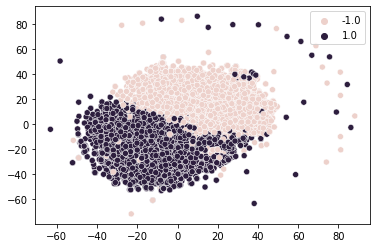

In [42]:
import numpy as np
from sklearn.manifold import TSNE
X2D = TSNE(n_components=2).fit_transform(X_train)
import seaborn as sns
sns.scatterplot(x=X2D[:,0], y=X2D[:,1],hue=y_train)

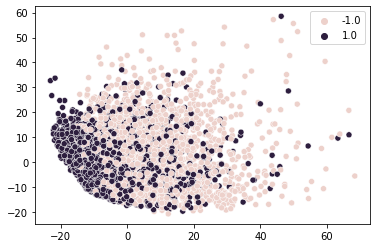

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X_train)
import seaborn as sns
sns.scatterplot(x=X2D[:,0], y=X2D[:,1],hue=y_train)

In [26]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()
m.fit(X_train,y_train)
y_t_pred=m.predict(X_test)
print(np.mean(y_test == y_t_pred))

0.981


In [27]:
from sklearn.metrics import accuracy_score
import numpy as np
import time 
class LogisticR:

  def __init__(self, w0, eta = 0.1, maxIter = 1000, alpha = 0.1, maxTime = None, tol = None, inertial = True):

    self.w = w0
    self.eta = eta
    self.maxIter = maxIter
    self.alpha = alpha
    self.maxTime = maxTime
    self.tol = tol
    self.Time = []
    self.obj = []
    self.acc_train = []
    self.nnz = []
    self.inertial = inertial 

  def soft_thresholding(self, v, gamma):
    return np.sign(v)*np.maximum(np.abs(v) - gamma,0)

  def fit(self, X_train, y_train, eval = True):

    n, d = X_train.shape

    X_train = np.c_[np.ones((n, 1)), X_train]
    
    Xw = X_train.dot(self.w)

    t = 1
    wp = self.w
    Xwp = Xw

    for iter in range(self.maxIter):
      
      start_time = time.time()

      if self.inertial:
        tp = t
      else:
        tp = 1
      t = (1+np.sqrt(1+4*tp**2))/2
      beta = (tp-1)/t 

      aa = y_train*((1+beta)*Xw - beta*Xwp)

      prob = 1/(1+np.exp(-aa))

      b = y_train*(1-prob)/n

      grad = X_train.T.dot(-b)

      v = (1+beta)*self.w - beta*wp - self.eta * grad
      wp = self.w
      self.w = self.soft_thresholding(v,self.eta*self.alpha)
      Xwp = Xw
      Xw = X_train.dot(self.w)

      self.Time.append(time.time() - start_time)
      if eval:

        bb = np.maximum(-aa,0)
        f_val = (np.log(np.exp(-bb) +  np.exp(-aa-bb)) + bb).mean()
        self.obj.append(f_val + self.alpha*np.abs(self.w).sum())

        self.nnz.append(np.count_nonzero(self.w))

        y_pred = np.sign(Xw)
        y_pred[y_pred==0] = 1
        self.acc_train.append(accuracy_score(y_train,y_pred))
        #stopping conditions
        if self.maxTime is not None:
          if np.sum(self.Time) > self.maxTime:
            print('Stopped by MaxTime at ',iter,'-th iterattion')
            break
        if self.tol is not None:
          if np.abs(self.obj[-1] - self.obj[-2]) <= self.tol:
            print('Stopped by the objective value at ',iter,'-th iterattion')
            break

  def predict(self, X_test):
    n, d = X_test.shape
    X_test = np.c_[np.ones((n, 1)), X_test]
    y_pred = np.sign(X_test.dot(self.w))
    y_pred[y_pred==0] = 1
    return y_pred

In [37]:
w0 = np.zeros(X_train.shape[1]+1) #np.random.randn(X_test.shape[1]+1)
model = LogisticR(w0,eta = 0.01, alpha = 0.01, maxTime=5)
model.fit(X_train,y_train)

Stopped by MaxTime at  111 -th iterattion


In [38]:
print(accuracy_score(y_test,model.predict(X_test)))

0.972


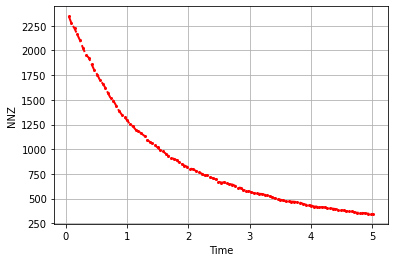

In [40]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(model.Time), model.nnz, 'o-', color='red', markersize=2, linewidth =2, linestyle='--')

plt.xlabel('Time')
plt.ylabel('NNZ')
# plt.title("")
plt.grid(True)

Practice:

1. Implement early-stopping
2. Implement a bactracking line search